[View in Colaboratory](https://colab.research.google.com/github/Gregory-Eales/NeuralNet-Digit-Recognition/blob/master/Digit_Recognition.ipynb)

In [0]:
# import dependencies
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [0]:
# load digit data set
x, uncleaned_y = datasets.load_digits(return_X_y=True)

x = x/10
# create a y for each classification: numbers 0-9 and stores it in 'answers'
answers = []
for i in range(10):
  zero = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  zero[i] = 1
  answers.append(zero)

# iterate through 'uncleaned_y' and add the correct classification for each y
y = []
for i in uncleaned_y:
  for j in range(10):
    if i == j:
      y.append(answers[j])

# convert y to an array      
y = np.array(y)

In [650]:
print()

[[0.  0.  0.4 ... 0.1 0.  0. ]
 [0.  0.  0.4 ... 1.5 0.5 0. ]
 [0.  0.  0.7 ... 0.  0.  0. ]
 ...
 [0.  0.  0.1 ... 0.6 0.  0. ]
 [0.  0.  0.2 ... 1.2 0.  0. ]
 [0.  0.  1.  ... 1.2 0.1 0. ]]


In [0]:
# define neural network model
class NeuralNetwork(object):
  
  def __init__(self, x, y, alpha=0.1, iterations=1000, num_layers=3, hidden_addition=1):
    
    # initiate class properties
    self.x = x
    self.y = y
    self.alpha = alpha
    self.iterations = iterations
    self.num_layers = num_layers
    self.w = {}
    self.b = {}
    self.z = {}
    self.a = {}
    self.e = {}
    self.historical_cost = []
    
    # create layer weights and layer variables
    for i in range(1, self.num_layers+hidden_addition):
      
      # if not the last weight initiate with eacher layer one bigger than the input size of x
      
      
      if i != self.num_layers:
        if i == 1:
          self.w["w"+str(i)] = np.random.randn(self.x.shape[1], self.x.shape[1]+hidden_addition)*0.5
          self.b["b"+str(i)] = np.random.randn(1, self.x.shape[1]+hidden_addition)*0.5
        else:  
          self.w["w"+str(i)] = np.random.randn(self.x.shape[1]+hidden_addition, self.x.shape[1]+hidden_addition)*0.5
          self.b["b"+str(i)] = np.random.randn(1, self.x.shape[1]+hidden_addition)*0.5
      
      # if the last weight initiate with output = dimensions of y
      else:
        self.w["w"+str(i)] = np.random.randn(self.x.shape[1]+hidden_addition, self.y.shape[1])*0.1
        self.b["b"+str(i)] = np.random.randn(1, self.y.shape[1])*0.1
      
      # doesnt matter, will be changed later                                               
      self.z["z" + str(i)] = np.zeros([self.x.shape[0], self.x.shape[1]])
      self.a["a" + str(i)] = np.zeros([self.x.shape[0], self.x.shape[1]])
    
  # calculate and make predictions
  def forward_propagation(self):
    
    # initiate forward propigation with dotting x an w1
    self.a['a0'] = self.x
    self.z["z1"] = np.dot(self.x, self.w["w1"]) + self.b['b1']
    self.a['a1'] = np.tanh(self.z['z1'])
    
    # iterate through all dots and activations
    for i in range(2, self.num_layers):
      self.z["z" + str(i)] = np.dot(self.a['a'+str(i-1)], self.w['w' + str(i)]) + self.b['b' + str(i)]
      self.a['a'+ str(i)] = np.tanh(self.z["z" + str(i)])
    
    # on the last iteration use sigmoid instead of tanh for classification
    self.z["z" + str(self.num_layers)] = np.dot(self.a['a'+str(self.num_layers-1)], self.w['w' + str(self.num_layers)]) + self.b['b' + str(self.num_layers)]
    self.a['a'+ str(self.num_layers)] = self.sigmoid(self.z["z" + str(self.num_layers)])
    return self.a['a'+str(self.num_layers)]
    
  # adjust weights based on cost function
  def backward_propagation(self):
    self.create_updates()
    #self.w['w3'] = self.w['w3'] - (self.alpha/self.x.shape[0])*np.dot((self.sigmoid_prime(self.z['z3'])*self.j_prime()).T, self.a['a2']).T
    
    # iterate throught weights
    for i in reversed(range(1, self.num_layers+1)):
      self.w["w"+str(i)] = self.w["w"+str(i)] - (self.alpha/self.x.shape[0])*np.dot(self.a['a'+str(i-1)].T, self.e['e'+str(i)]) 
      self.b["b"+str(i)] = self.b["b"+str(i)] - (self.alpha/self.x.shape[0])*np.sum(self.e['e'+str(i)], axis=0)
                                                                                                                                 
  
  # returns the derivative of the cost
  def j_prime(self):
    return (self.y/self.a['a' + str(self.num_layers)] - (1-self.y)/(1-self.a['a' + str(self.num_layers)]))
  
  # creates update cache
  def create_updates(self):
    self.e['e'+str(self.num_layers)] = self.j_prime()*self.sigmoid_prime(self.z['z'+str(self.num_layers)])
    for i in reversed(range(1, self.num_layers)):
      self.e['e'+str(i)] =  np.dot(self.e['e' + str(i+1)], self.w['w' + str(i+1)].T)*self.tanh_prime(self.z['z'+str(i)])
      
      
  # optimize model based on inputes
  def optimize(self):
    
    for i in range(self.iterations):
      if i%100 == 0:
        print(str(i/10) + "%")
      self.forward_propagation()
      self.backward_propagation()
      self.historical_cost.append(self.cost_function())
    print("Complete")
    
  # calculate the cost of prections
  def cost_function(self):
    j = -(np.sum(self.y*np.log(self.a['a'+str(self.num_layers)]) + (1-self.y)*np.log(1 - self.a['a'+ str(self.num_layers)]))/self.x.shape[0])
    return j
  
  # sigmoid activation function
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))
    
  # derivative of sigmoid activation function
  def sigmoid_prime(self, z):
    return -np.exp(-z)/np.square(1 + np.exp(-z))
  
  # derivative of tanh activation function
  def tanh_prime(self, z):
    return 1 - np.square(np.tanh(z))
  

In [0]:
NN = NeuralNetwork(x[0:1700], y[0:1700], alpha=0.12, iterations=1000, num_layers=5, hidden_addition=1)

In [646]:
NN.optimize()

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
Complete


In [0]:
x_axis = []
for i in range(NN.iterations):
  x_axis.append(i)

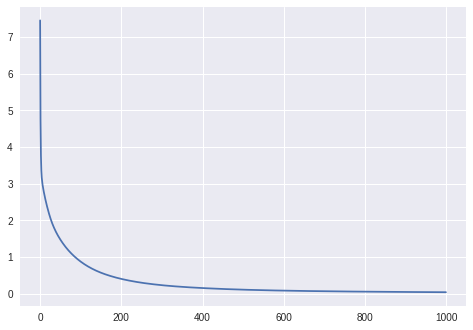

[7.455627013244632, 4.740018674680526, 3.765332396648948, 3.358942736194338, 3.1667529844572737, 3.0542618345548944, 2.9721587469709827, 2.903266941204761, 2.840877141032139, 2.782324895687117, 2.7264784124523933, 2.672780226985641, 2.6209329518407074, 2.5707607680102544, 2.5221421225215988, 2.4750032650850695, 2.429291172077051, 2.3849238051957755, 2.3417991082406986, 2.299826326625253, 2.258954941969797, 2.219187361919633, 2.1805527114592893, 2.1430723632337583, 2.106761694498991, 2.0716525206307197, 2.0377704138360744, 2.005095477007677, 1.973578743120659, 1.94316129091793, 1.9137773992570697, 1.8853585584562078, 1.8578423231959922, 1.8311782059582824, 1.805325312815098, 1.7802459119130662, 1.755902058687688, 1.7322556991969922, 1.7092695152546389, 1.6869072696088503, 1.6651338700581757, 1.643915615089, 1.6232203165666323, 1.6030168773588138, 1.5832749159866222, 1.563965586380756, 1.5450641383643942, 1.5265522645409475, 1.508415323959393, 1.4906361734476286, 1.4731944191004451, 1.45

In [651]:
plt.plot(x_axis, NN.historical_cost)
plt.show()
print(NN.historical_cost)
NN.x = x[1700:x.shape[0]]
NN.y = y[1700:x.shape[0]]
predictions = (NN.forward_propagation())
p = np.zeros_like(predictions)
p[np.arange(len(predictions)), predictions.argmax(1)] = 1

print(p[30:40])
print(y[30:40])


In [652]:
correct = 0
for i in range(len(p)):
  if p.tolist()[i] == y[1700:y.shape[0]].tolist()[i]:
    correct += 1

print("The model is " + str((correct/len(p))*100) + "% accurate")  

The model is 93.81443298969072% accurate
